In [16]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium 
from folium import plugins
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot
import cufflinks as cf


plt.rcParams['figure.figsize']=25,18
import warnings
warnings.filterwarnings('ignore')

pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [17]:
df=pd.read_csv("covid_19_data.csv")
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [18]:
df.shape

(202594, 8)

In [19]:
df.rename(columns={'ObservationDate':'Date'},inplace=True)
df.rename(columns={'Province/State':'State'},inplace=True)
df.rename(columns={'Country/Region':'Country'},inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202594 entries, 0 to 202593
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   SNo          202594 non-null  int64  
 1   Date         202594 non-null  object 
 2   State        147708 non-null  object 
 3   Country      202594 non-null  object 
 4   Last Update  202593 non-null  object 
 5   Confirmed    202593 non-null  float64
 6   Deaths       202593 non-null  float64
 7   Recovered    202593 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 12.4+ MB


In [21]:
confirmed=df.groupby('Date').sum()['Confirmed'].reset_index()
death=df.groupby('Date').sum()['Deaths'].reset_index()
recovered=df.groupby('Date').sum()['Recovered'].reset_index()


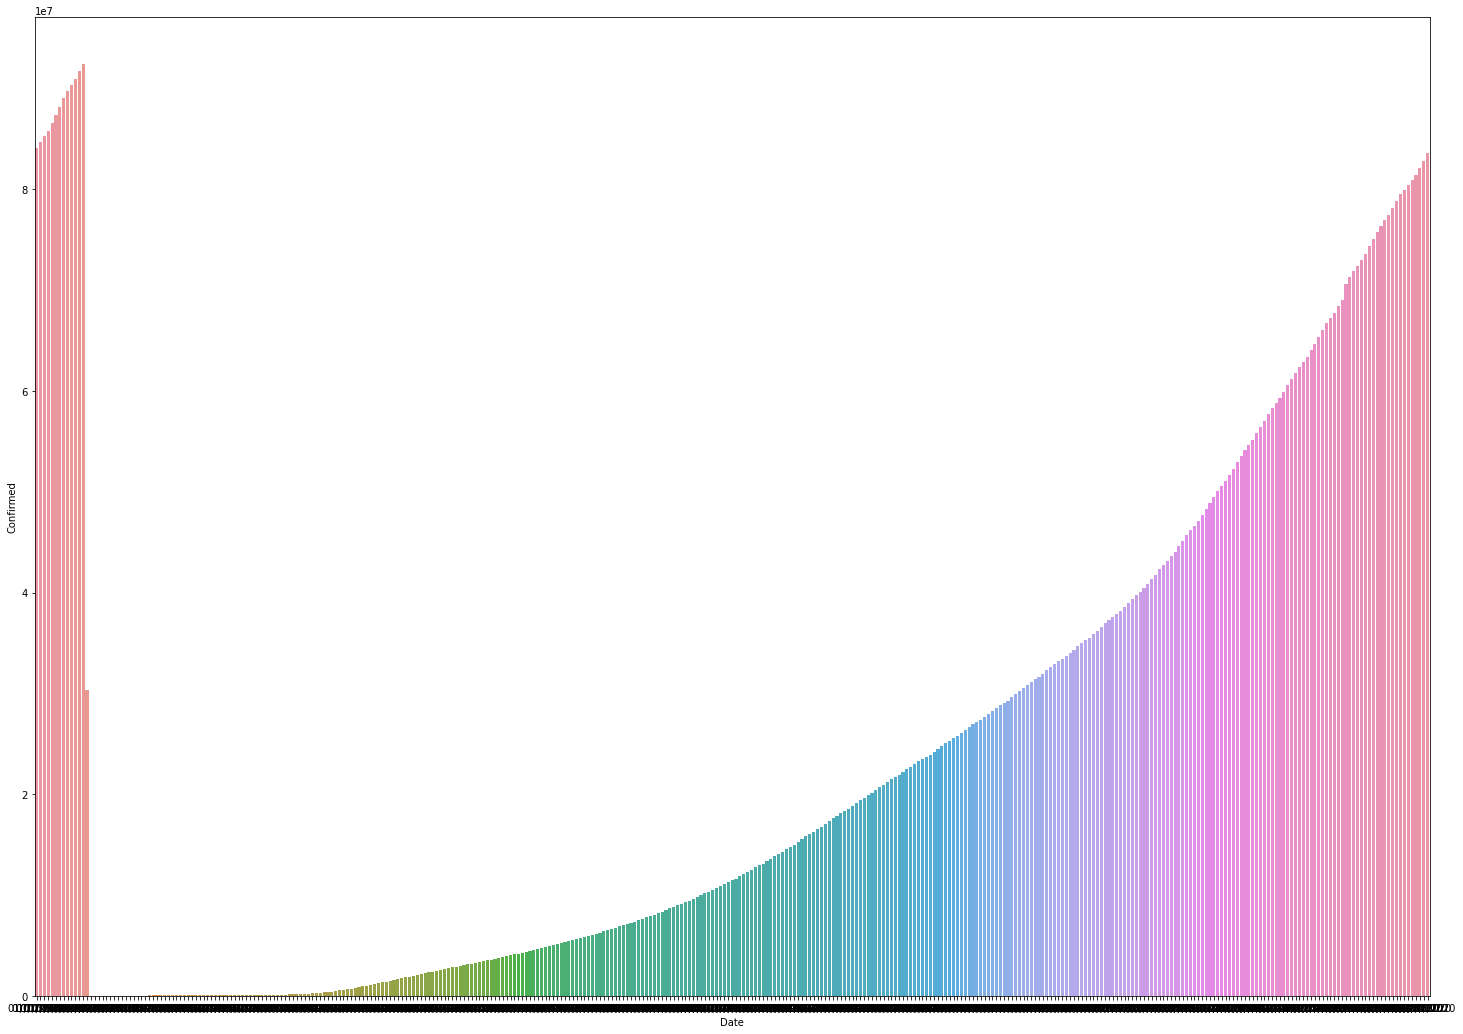

In [22]:
sns.barplot(x=confirmed.Date,y=confirmed.Confirmed,data=confirmed)

In [23]:
confirmed.iplot(kind='bar',x='Date',y='Confirmed')

In [24]:
death.iplot(kind='bar',x='Date',y='Deaths')

In [25]:
recovered.iplot(kind='bar',x='Date',y='Recovered')

In [26]:
from fbprophet import Prophet

In [27]:
confirmed.columns=['ds','y']
confirmed['ds']=pd.to_datetime(confirmed['ds'])


In [28]:
confirmed.shape

(359, 2)

In [29]:
model=Prophet(interval_width=0.95)
model.fit(confirmed)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [31]:
future=model.make_future_dataframe(periods=30)

In [32]:
future

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
384,2021-02-09
385,2021-02-10
386,2021-02-11
387,2021-02-12


In [33]:
forecast=model.predict(future)

In [35]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-1.024519e+06,-7.099314e+06,5.369490e+06,-1.024519e+06,-1.024519e+06,184996.345489,184996.345489,184996.345489,184996.345489,184996.345489,184996.345489,0.0,0.0,0.0,-8.395231e+05
1,2020-01-23,-9.906210e+05,-8.613092e+06,3.973635e+06,-9.906210e+05,-9.906210e+05,-972605.153469,-972605.153469,-972605.153469,-972605.153469,-972605.153469,-972605.153469,0.0,0.0,0.0,-1.963226e+06
2,2020-01-24,-9.567224e+05,-7.115556e+06,5.388057e+06,-9.567224e+05,-9.567224e+05,183485.202097,183485.202097,183485.202097,183485.202097,183485.202097,183485.202097,0.0,0.0,0.0,-7.732372e+05
3,2020-01-25,-9.228239e+05,-6.617424e+06,5.563333e+06,-9.228239e+05,-9.228239e+05,187104.686944,187104.686944,187104.686944,187104.686944,187104.686944,187104.686944,0.0,0.0,0.0,-7.357192e+05
4,2020-01-26,-8.889254e+05,-7.430444e+06,4.964334e+06,-8.889254e+05,-8.889254e+05,155907.653091,155907.653091,155907.653091,155907.653091,155907.653091,155907.653091,0.0,0.0,0.0,-7.330178e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,2021-02-09,1.033952e+08,9.766578e+07,1.098217e+08,1.019885e+08,1.045319e+08,134000.832348,134000.832348,134000.832348,134000.832348,134000.832348,134000.832348,0.0,0.0,0.0,1.035292e+08
385,2021-02-10,1.039550e+08,9.799759e+07,1.109013e+08,1.024798e+08,1.051463e+08,184996.345490,184996.345490,184996.345490,184996.345490,184996.345490,184996.345490,0.0,0.0,0.0,1.041400e+08
386,2021-02-11,1.045148e+08,9.670560e+07,1.097361e+08,1.029653e+08,1.057926e+08,-972605.153469,-972605.153469,-972605.153469,-972605.153469,-972605.153469,-972605.153469,0.0,0.0,0.0,1.035422e+08
387,2021-02-12,1.050746e+08,9.931382e+07,1.114781e+08,1.034926e+08,1.064279e+08,183485.202096,183485.202096,183485.202096,183485.202096,183485.202096,183485.202096,0.0,0.0,0.0,1.052581e+08


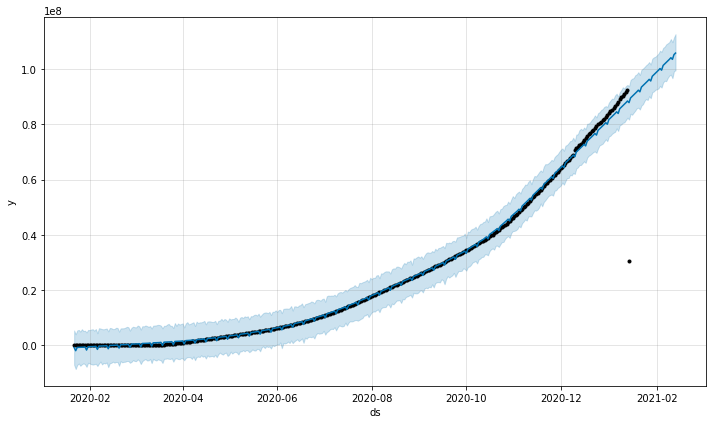

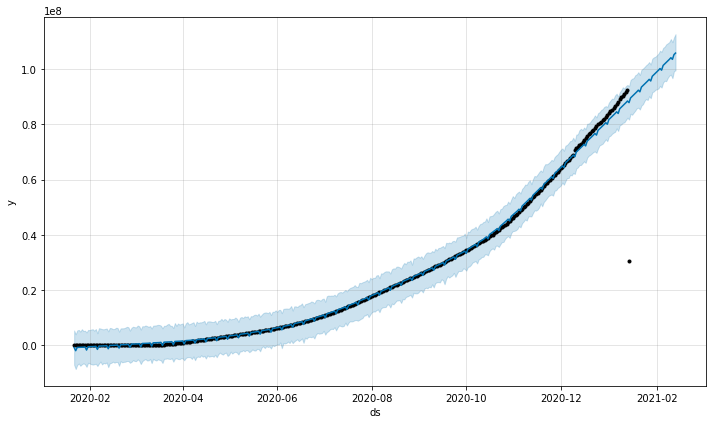

In [42]:
model.plot(forecast)

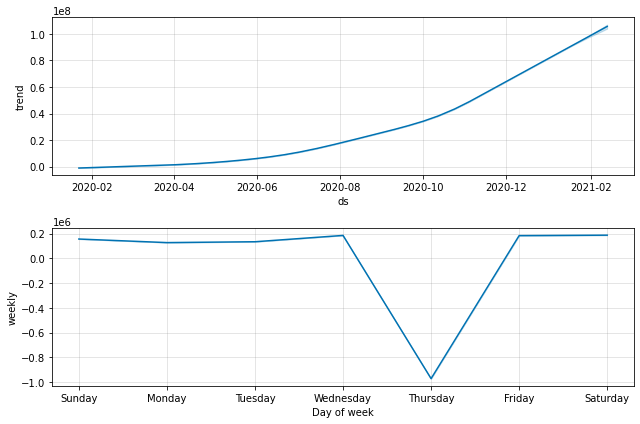

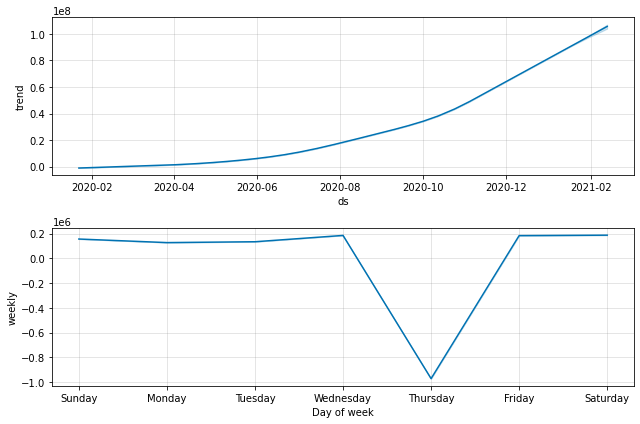

In [39]:
model.plot_components(forecast)

In [47]:
death.columns=['ds','y']
death['ds']=pd.to_datetime(confirmed['ds'])
m=Prophet(interval_width=0.95)
m.fit(death)
future=m.make_future_dataframe(periods=30)
forecast=m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


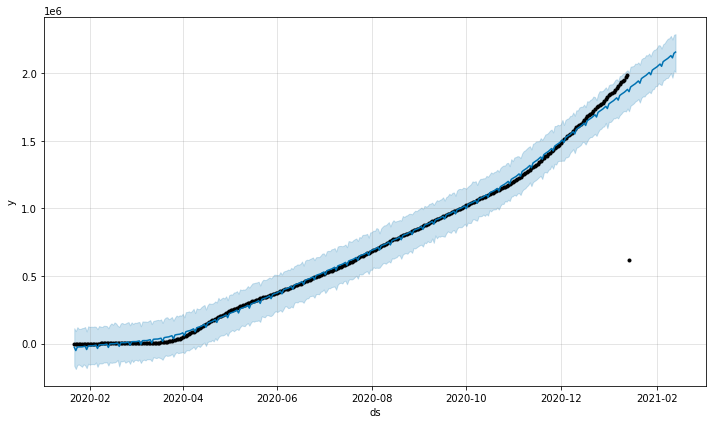

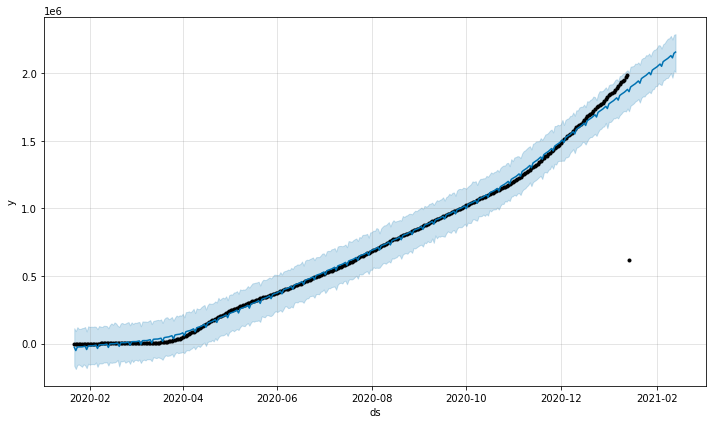

In [49]:
m.plot(forecast)